In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [2]:
data = load_diabetes()

df = pd.DataFrame(data.data, columns = data.feature_names)
df['TARGET'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=2)


In [4]:
coefs = []
r2_scores = []

for i in [0, 0.1, 1, 10]:
  reg = Lasso(alpha =i)
  reg.fit(X_train, y_train)

  coefs.append(reg.coef_.tolist())
  y_pred = reg.predict(X_test)
  r2_scores.append(r2_score(y_test, y_pred))

<ipython-input-4-498b0c57bcf3>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


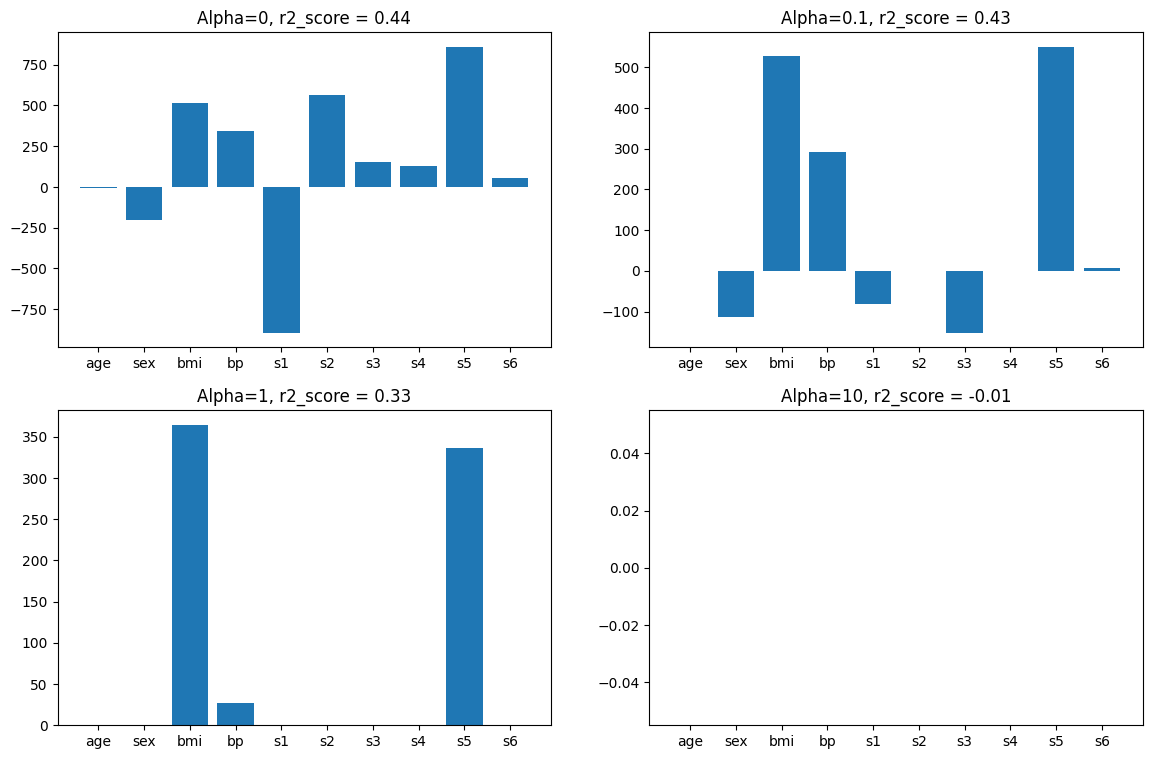

In [5]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names, coefs[0])
plt.title('Alpha=0, r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names, coefs[1])
plt.title('Alpha=0.1, r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names, coefs[2])
plt.title('Alpha=1, r2_score = {}'.format(round(r2_scores[2],2)))


plt.subplot(224)
plt.bar(data.feature_names, coefs[3])
plt.title('Alpha=10, r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

**as we can see that feature selection happens, less important features are reduced to zero.**

# 2. Higher Coefficients are affected more

In [6]:
alphas = [0 , 0.0001, 0.001, 0.01, 0.1 , 1,10,100, 1000, 10000]

coefs = []

for i in alphas:
  reg = Lasso(alpha =i)
  reg.fit(X_train, y_train)

  coefs.append(reg.coef_.tolist())

<ipython-input-6-7926683c181e>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [7]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array, columns = data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [8]:
alphas = [0 , 0.0001, 0.0005, 0.001, 0.005 , 0.1,0.5,1,5, 10]

coefs = []

for i in alphas:
  reg = Lasso(alpha =i)
  reg.fit(X_train, y_train)

  coefs.append(reg.coef_.tolist())

<ipython-input-8-993e4f4ae137>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


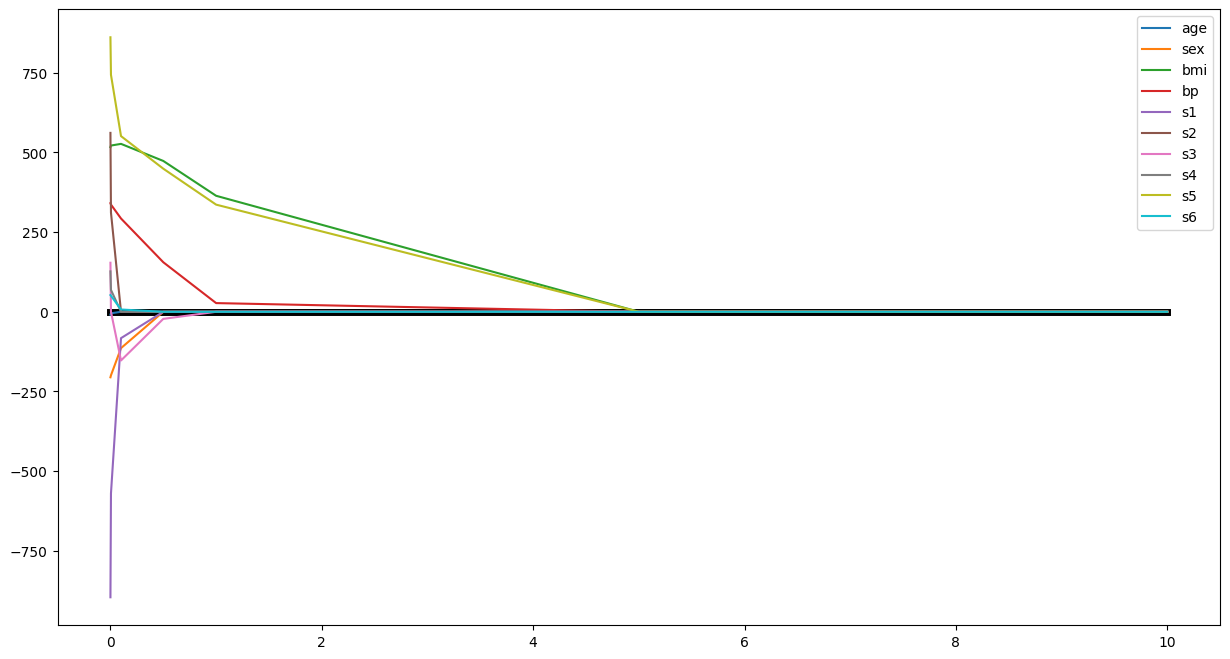

In [9]:
input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas, np.zeros(len(alphas)), color ='black', linewidth =5)
for i in range(input_array.shape[0]):
  plt.plot(alphas, input_array[i], label = data.feature_names[i])
plt.legend()

**As we can see higher values converge faster**

# Impact on Bias and Variance

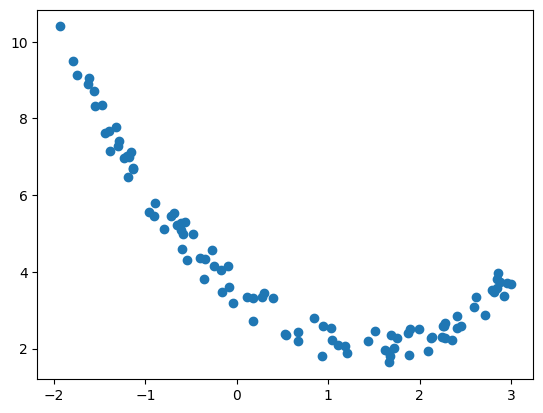

In [10]:
m = 100
X = 5 * np.random.rand(m,1) - 2
y = 0.7 * X ** 2 -2 *X +3 + np.random.rand(m,1)

plt.scatter(X,y)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(100,1), y.reshape(100),  test_size=0.2, random_state=2)


In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_train = poly.fit_transform(X_train)
x_test = poly.transform(X_test)

In [15]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss =[]
bias = []
variance =[]

for i in alphas:
  reg = Lasso(alpha=i)
  avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
      reg, X_train, y_train, X_test, y_test,
      loss = 'mse',
      random_seed = 123)
  loss.append(avg_expected_loss)
  bias.append(avg_bias)
  variance.append(avg_var)

/usr/local/lib/python3.10/dist-packages/mlxtend/evaluate/bias_variance_decomp.py:130: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  pred = estimator.fit(X_boot, y_boot, **fit_params).predict(X_test)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.912e+00, tolerance: 4.060e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

ValueError: ignored

# 4. Effect of Regularization on Loss Fucntion

[27.82809103]
-2.29474455867698


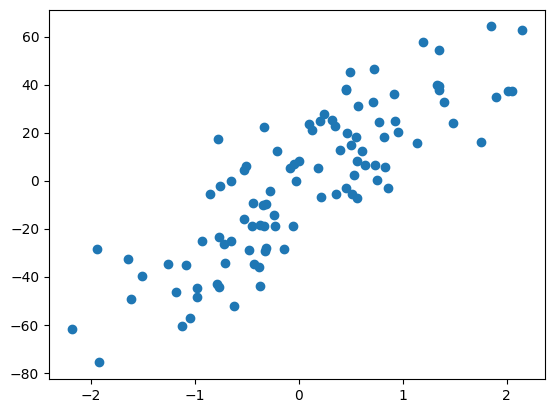

In [17]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples = 100, n_features = 1, n_informative=1, n_targets=1, noise =20, random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)


In [18]:
def cal_loss(m, alpha):
  return np.sum((y - m*X.ravel() + 2.29)**2) + alpha* abs(m)


In [19]:
def predict(m):
  return m*X - 2.29

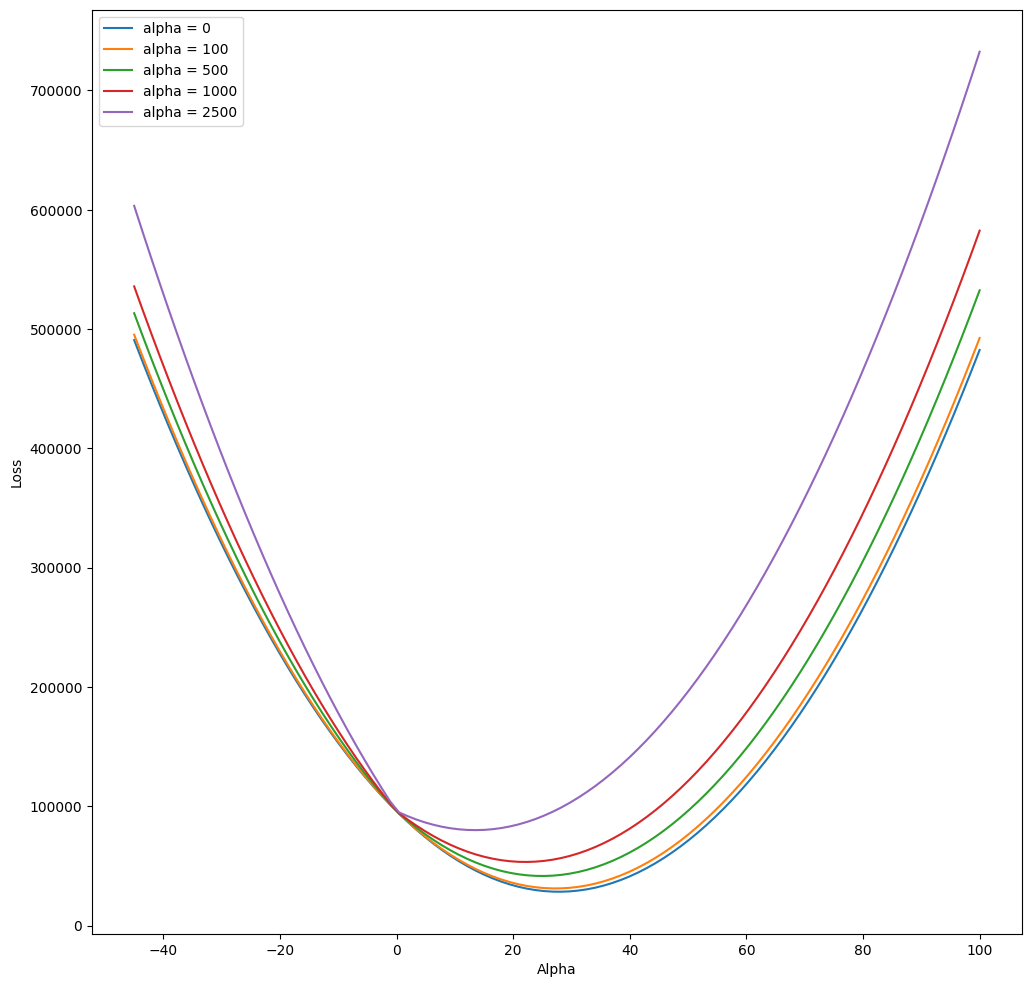

In [22]:
m = np.linspace(-45, 100,100)
plt.figure(figsize = (12,12))
for j in [0,100,500,1000,2500]:
  loss=[]
  for i in range(m.shape[0]):
    loss_i = cal_loss(m[i], j)
    loss.append(loss_i)
  plt.plot(m, loss, label='alpha = {}'.format(j))
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Loss")
plt.show()